In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.utils as image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
import cv2
import matplotlib.pyplot as plt
import os
import random
import glob
from os.path import isdir

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir = '/content/drive/MyDrive/'

In [ ]:
name = os.listdir(dir)
name

['Colab Notebooks',
 'test_total_image',
 'Scan_0008_1.jpg',
 'Scan_0009_2.jpg',
 'models',
 '7 classes model',
 '뿌리 전체',
 '1_엑스레이',
 '3_뿌리_강조',
 '2_지면_위로_뿌리',
 '뿌리_models',
 '뿌리_models2',
 '2_지면_위로_뿌리_2',
 '동물_곤충_O',
 '동물_곤충_X',
 '나이테_나무껍질_옹이_X',
 '나이테_나무껍질_옹이_O',
 '줄기 전체']

In [ ]:
_1, _2, _3, _4, _5, _6 = [],[],[],[],[],[]
_1.append(os.listdir(dir + '1_엑스레이'))
_2.append(os.listdir(dir +'2_지면_위로_뿌리_2'))
_3.append(os.listdir(dir + '3_뿌리_강조'))

In [ ]:
total_list = []
total_list.append(os.listdir(dir + '1_엑스레이'))
total_list.append(os.listdir(dir +'2_지면_위로_뿌리_2'))
total_list.append(os.listdir(dir + '3_뿌리_강조'))
print(total_list)

[['뿌리128.png', '뿌리131.png', '뿌리242.png', '뿌리243.png', '뿌리203.png', '뿌리204.png', '뿌리205.png', '뿌리206.png', '뿌리207.png', '뿌리208.png', '뿌리209.png', '뿌리210.png', '뿌리211.png', '뿌리212.png', '뿌리213.png', '뿌리214.png', '뿌리215.png', '뿌리216.png', '뿌리217.png', '뿌리218.png', '뿌리219.png', '뿌리220.png', '뿌리221.png', '뿌리222.png', '뿌리223.png', '뿌리224.png', '뿌리225.png', '뿌리226.png', '뿌리227.png', '뿌리228.png', '뿌리229.png', '뿌리230.png', '뿌리231.png', '뿌리232.png', '뿌리233.png', '뿌리234.png', '뿌리235.png', '뿌리236.png', '뿌리237.png', '뿌리238.png', '뿌리239.png', '뿌리240.png', '뿌리241.png', '뿌리244.png', '뿌리245.png', '뿌리246.png', '뿌리247.png', '뿌리248.png', '뿌리249.png', '뿌리250.png', '뿌리251.png', '뿌리252.png', '뿌리253.png', '뿌리254.png', '뿌리255.png', '뿌리256.png', '뿌리257.png', '뿌리258.png', '뿌리259.png', '뿌리260.png', '뿌리261.png', '뿌리262.png', '뿌리263.png', '뿌리264.png', '뿌리265.png', '뿌리266.png', '뿌리267

In [ ]:
total_list = np.concatenate(total_list).tolist()
print(total_list)

['뿌리128.png', '뿌리131.png', '뿌리242.png', '뿌리243.png', '뿌리203.png', '뿌리204.png', '뿌리205.png', '뿌리206.png', '뿌리207.png', '뿌리208.png', '뿌리209.png', '뿌리210.png', '뿌리211.png', '뿌리212.png', '뿌리213.png', '뿌리214.png', '뿌리215.png', '뿌리216.png', '뿌리217.png', '뿌리218.png', '뿌리219.png', '뿌리220.png', '뿌리221.png', '뿌리222.png', '뿌리223.png', '뿌리224.png', '뿌리225.png', '뿌리226.png', '뿌리227.png', '뿌리228.png', '뿌리229.png', '뿌리230.png', '뿌리231.png', '뿌리232.png', '뿌리233.png', '뿌리234.png', '뿌리235.png', '뿌리236.png', '뿌리237.png', '뿌리238.png', '뿌리239.png', '뿌리240.png', '뿌리241.png', '뿌리244.png', '뿌리245.png', '뿌리246.png', '뿌리247.png', '뿌리248.png', '뿌리249.png', '뿌리250.png', '뿌리251.png', '뿌리252.png', '뿌리253.png', '뿌리254.png', '뿌리255.png', '뿌리256.png', '뿌리257.png', '뿌리258.png', '뿌리259.png', '뿌리260.png', '뿌리261.png', '뿌리262.png', '뿌리263.png', '뿌리264.png', '뿌리265.png', '뿌리266.png', '뿌리267.

In [ ]:
_1 = np.concatenate(_1).tolist()
_2 = np.concatenate(_2).tolist()
_3 = np.concatenate(_3).tolist()

In [ ]:
df = pd.DataFrame({
    'imgs' : total_list
})

In [ ]:
df1 = pd.DataFrame({
    '_1' : _1
})
df2 = pd.DataFrame({
    '_2' : _2
})
df3 = pd.DataFrame({
    '_3' : _3
})

In [ ]:
result = pd.merge(df,df1, how='left', left_on='imgs', right_on='_1')
result = pd.merge(result,df2, how='left', left_on='imgs', right_on='_2')
result = pd.merge(result,df3, how='left', left_on='imgs', right_on='_3')
result = pd.merge(result,df4, how='left', left_on='imgs', right_on='_4')
result = pd.merge(result,df5, how='left', left_on='imgs', right_on='_5')

In [ ]:
result = result.fillna(0)

In [ ]:
result

,imgs,_1,_2,_3
0,뿌리128.png,뿌리128.png,0,0
1,뿌리131.png,뿌리131.png,0,0
2,뿌리242.png,뿌리242.png,0,0
3,뿌리243.png,뿌리243.png,0,0
4,뿌리203.png,뿌리203.png,0,0
...,...,...,...,...
246,뿌리189.png,0,0,뿌리189.png
247,뿌리190.png,0,0,뿌리190.png
248,뿌리191.png,0,0,뿌리191.png
249,뿌리192.png,0,0,뿌리192.png


In [ ]:
def binary(data):
    if data != 0:
        data = 1
        return data
    else:
        return data
result['_1'] = result['_1'].apply(binary)
result['_2'] = result['_2'].apply(binary)
result['_3'] = result['_3'].apply(binary)
result['_4'] = result['_4'].apply(binary)
result['_5'] = result['_5'].apply(binary)

In [ ]:
result

,imgs,_1,_2,_3
0,뿌리128.png,1,0,0
1,뿌리131.png,1,0,0
2,뿌리242.png,1,0,0
3,뿌리243.png,1,0,0
4,뿌리203.png,1,0,0
...,...,...,...,...
246,뿌리189.png,0,0,1
247,뿌리190.png,0,0,1
248,뿌리191.png,0,0,1
249,뿌리192.png,0,0,1


In [ ]:
result.columns = ['imgs','1_엑스레이', '2_지면_위로_뿌리_2','3_뿌리_강조']

In [ ]:
result

,imgs,1_엑스레이,2_지면_위로_뿌리_2,3_뿌리_강조
0,뿌리128.png,1,0,0
1,뿌리131.png,1,0,0
2,뿌리242.png,1,0,0
3,뿌리243.png,1,0,0
4,뿌리203.png,1,0,0
...,...,...,...,...
246,뿌리189.png,0,0,1
247,뿌리190.png,0,0,1
248,뿌리191.png,0,0,1
249,뿌리192.png,0,0,1


In [ ]:
def chage(data):
    if data == 1:
        data = 0
        return data
    else:
        data = 1
        return data
result['1_엑스레이'] = result['1_엑스레이'].apply(chage)

# result['_2'] = result['_2'].apply(binary)
# result['_3'] = result['_3'].apply(binary)

In [ ]:
def chage2(data):
    if data == 1:
        data = 2
        return data
    else:
        data = 0
        return data
result['3_뿌리_강조'] = result['3_뿌리_강조'].apply(chage2)

In [ ]:
result[:82]

,imgs,1_엑스레이,2_지면_위로_뿌리_2,3_뿌리_강조
0,뿌리128.png,0,0,0
1,뿌리131.png,0,0,0
2,뿌리242.png,0,0,0
3,뿌리243.png,0,0,0
4,뿌리203.png,0,0,0
...,...,...,...,...
77,뿌리278.png,0,0,0
78,뿌리279.png,0,0,0
79,뿌리280.png,0,0,0
80,뿌리1.png,1,1,0


In [ ]:
data_1 = result.iloc[0:81]
data_1 = data_1[['imgs','1_엑스레이']]
data_1.columns = ['imgs','뿌리']

In [ ]:
data_2 = result.iloc[81:186]
data_2 = data_2[['imgs','2_지면_위로_뿌리_2']]
data_2.columns = ['imgs','뿌리']

In [ ]:
data_3 = result.iloc[186:]
data_3 = data_3[['imgs','3_뿌리_강조']]
data_3.columns = ['imgs','뿌리']

In [ ]:
data_merge = pd.concat([data_1, data_2], axis = 0) 

In [ ]:
data_merge2 = pd.concat([data_merge, data_3], axis = 0) 

In [ ]:
data_merge2['뿌리'].value_counts()

1    105
0     81
2     65
Name: 뿌리, dtype: int64

In [ ]:
import sklearn
data_merge2_shuffled = sklearn.utils.shuffle(data_merge2)

In [ ]:
data_merge2_shuffled

,imgs,뿌리
79,뿌리280.png,0
19,뿌리218.png,0
17,뿌리216.png,0
188,뿌리9.png,2
217,뿌리110.png,2
...,...,...
75,뿌리276.png,0
14,뿌리213.png,0
205,뿌리61.png,2
247,뿌리190.png,2


In [ ]:
data = data_merge2_shuffled

In [ ]:
IMAGE_PATH = '/content/drive/MyDrive/뿌리 전체/'

In [ ]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=1, stratify=data['뿌리'])

In [ ]:
#확인
print("Train set rows: {}".format(train_df.shape[0]))
print("Test  set rows: {}".format(test_df.shape[0]))

Train set rows: 200
Test  set rows: 51


In [ ]:
def read_image(file_name):
  # print(file_name)
  image = cv2.imread(IMAGE_PATH + file_name)
  image = cv2.resize(image, dsize=(300, 300))
  # print(image.shape)
  return image[:,:,:3]

In [ ]:
def categories_encoder(dataset):
    #file명을 읽어 이미지 경로에서 불러온다. X 값.
    X = np.stack(dataset['imgs'].apply(read_image))
    # subspecies를 더미변수화 하여 y값으로
    y = pd.get_dummies(dataset['뿌리'], drop_first=False)
    return X, y

In [ ]:
#file명을 읽어 이미지 경로에서 불러온다. X 값.
X_train, y_train = categories_encoder(train_df)
X_test, y_test = categories_encoder(test_df)

In [ ]:
#개수, size, channel
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(200, 300, 300, 3)
(200, 3)
(51, 300, 300, 3)
(51, 3)


In [ ]:
#하이퍼 파라미터 생성
BATCH_SIZE = 7 # 한 번에 처리할 데이터량 설정
EPOCHS = 20 # 신경망을 학습할 횟수
VERBOSE = 1 # 학습 진행 상황 출력 모드 설정 

In [ ]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 7.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import efficientnet.keras as efn 
import keras 
from keras.models import Model

from keras.applications.imagenet_utils import decode_predictions

from efficientnet.keras import EfficientNetB0, EfficientNetB3
from efficientnet.keras import center_crop_and_resize, preprocess_input

## if you use tensorflow.keras: 
# from efficientnet.tfkeras import EfficientNetB0
# from efficientnet.tfkeras import center_crop_and_resize, preprocess_input

import os

In [ ]:
base_model = efn.EfficientNetB3(weights='imagenet') #imagenet 가중치 사용

50086816/50086816 [==============================] - 3s 0us/step


In [ ]:
#output layer 변경
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
net = Dense(3, activation='softmax')(base_model.layers[-2].output)

In [ ]:
model = Model(inputs=base_model.input, outputs=net)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 296, 296, 16)      1216      
                                                                 
 batch_normalization_36 (Bat  (None, 296, 296, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 148, 148, 16)     0         
 g2D)                                                            
                                                                 
 dropout_54 (Dropout)        (None, 148, 148, 16)      0         
                                                                 
 conv2d_37 (Conv2D)          (None, 144, 144, 32)      12832     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 72, 72, 32)      

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 150, 150, 40  1080        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 150, 150, 40  160         ['stem_conv[0][0]']              
                                )                                                             

In [ ]:
%cd /content/drive/MyDrive/뿌리_models2/
checkpoint_path = "/content/drive/MyDrive/뿌리_models2/check_pointcp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

/content/drive/MyDrive/뿌리_models2


In [ ]:
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(patience=15)
# cp_callback = keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_path, 
#     verbose=1, 
#     save_weights_only=True,
#     save_freq=7*BATCH_SIZE)

history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=8,
    verbose=VERBOSE,
    validation_split=0.2
    # callbacks=[cp_callback]
)

Epoch 1/300
20/20 [==============================] - 61s 409ms/step - loss: 0.6726 - accuracy: 0.7312 - val_loss: 150.5903 - val_accuracy: 0.3750
Epoch 2/300
20/20 [==============================] - 5s 241ms/step - loss: 0.5166 - accuracy: 0.8062 - val_loss: 34.1943 - val_accuracy: 0.3750
Epoch 3/300
20/20 [==============================] - 5s 241ms/step - loss: 0.1710 - accuracy: 0.9438 - val_loss: 144.5768 - val_accuracy: 0.4500
Epoch 4/300
20/20 [==============================] - 5s 242ms/step - loss: 0.2909 - accuracy: 0.9125 - val_loss: 1.9830 - val_accuracy: 0.7250
Epoch 5/300
20/20 [==============================] - 5s 242ms/step - loss: 0.4646 - accuracy: 0.8750 - val_loss: 0.6835 - val_accuracy: 0.7750
Epoch 6/300
20/20 [==============================] - 5s 243ms/step - loss: 0.2134 - accuracy: 0.9375 - val_loss: 0.7340 - val_accuracy: 0.8500
Epoch 7/300
20/20 [==============================] - 5s 243ms/step - loss: 0.1030 - accuracy: 0.9625 - val_loss: 0.1983 - val_accuracy: 

In [ ]:
# import tensorflow as tf
# import numpy as np
# test = tf.constant(np.ones((200,200)))

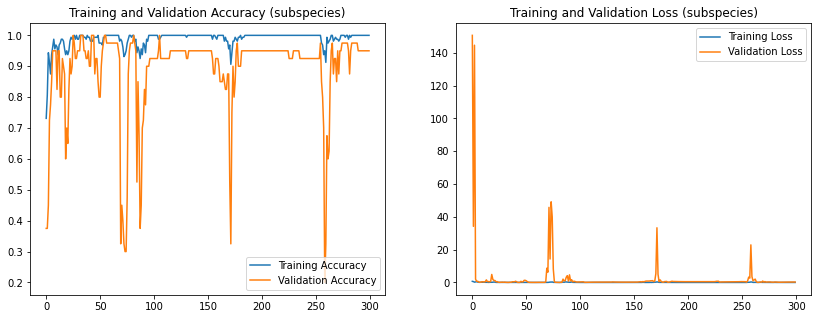

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (subspecies)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (subspecies)')

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 5s 1s/step - loss: 0.4649 - accuracy: 0.8824


[0.46488481760025024, 0.8823529481887817]

In [ ]:
predictions = model.predict(X_test)

2/2 [==============================] - 2s 228ms/step


In [ ]:
np.argmax(predictions[2])

2

In [ ]:
%cd /content/drive/MyDrive/7 classes model
from keras.models import load_model
model.save('뿌리_model.h5')

/content/drive/MyDrive/7 classes model


In [ ]:
y_test.head(10)

,0,1,2
2,1,0,0
248,0,0,1
231,0,0,1
111,0,1,0
200,0,0,1
54,1,0,0
204,0,0,1
250,0,0,1
86,0,1,0
43,1,0,0


In [ ]:
predicted = model.predict(X_test)
y_pred=[]
for sample in  predicted:
  y_pred.append([1 if i>=0.5 else 0 for i in sample ] )
y_pred = np.array(y_pred)
y_pred

2/2 [==============================] - 0s 221ms/step


array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [ ]:
from sklearn.metrics import classification_report
label_names = ['1_엑스레이', '2_지면_위로_뿌리_2','3_뿌리_강조']
# label_names = [ '열매있음','윗쪽으로 뻗는','잎이 안 큰','잎무성한','꽃있음', '그물', '잎이 큰']

print(classification_report(y_test, y_pred,target_names=label_names))

                     precision    recall  f1-score   support

        1_엑스레이       1.00      1.00      1.00        17
2_지면_위로_뿌리_2       0.83      0.90      0.86        21
       3_뿌리_강조       0.82      0.69      0.75        13

          micro avg       0.88      0.88      0.88        51
          macro avg       0.88      0.87      0.87        51
       weighted avg       0.88      0.88      0.88        51
        samples avg       0.88      0.88      0.88        51



1/1 [==============================] - 0s 41ms/step
2_지면_위로_뿌리_2 (0.593)
3_뿌리_강조 (0.398)
1_엑스레이 (0.00836)
2/2 [==============================] - 0s 119ms/step - loss: 0.4649 - accuracy: 0.8824
Accuracy =  88.23529481887817 %


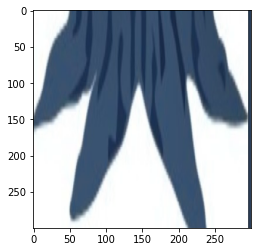

In [ ]:
img = image.load_img('/content/drive/MyDrive/뿌리 전체/뿌리75.png', target_size=(300,300,3))
img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(result.columns[1:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

#Print classes and corresponding probabilities
for i in range(3):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))


_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")